#### Develop Word2Vec Embedding with Gensim



https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [1]:
!pip install --upgrade gensim

In [2]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.8162032e-03 -1.0833179e-03 -2.9263171e-04 -3.0582407e-03
 -4.8486739e-03 -2.3253981e-03 -4.9604876e-03  2.4253984e-03
  2.1945904e-03  2.3670518e-03  4.4375411e-03 -3.3023478e-03
  2.5352470e-03 -1.3530514e-03 -4.6060389e-04 -2.2133642e-03
  4.8851641e-04  1.5501290e-03 -4.5006564e-03 -4.1351859e-03
  3.4514468e-03  2.2086841e-03 -1.0856190e-03 -2.1945313e-03
  1.8293413e-03  3.4138530e-03 -4.9216729e-03  1.4833305e-03
  4.6449825e-03  4.7331746e-03 -2.9626114e-03  1.3339799e-04
  1.8068557e-03  3.7914568e-03 -2.1689718e-03  3.8699051e-03
 -2.9396962e-03  1.3010194e-04 -1.7744097e-03  4.8324247e-03
  6.8562897e-04 -2.0694830e-03 -1.2904170e-03 -3.3524113e-03
 -2.9891357e-03 -2.5320379e-04  4.5975940e-03  1.9475856e-03
 -1.6716407e-03 -3.7119302e-03  3.8857264e-03 -1.9683645e-03
  1.2316259e-03  2.5873883e-03 -2.3129268e-0

C:\Users\nboateng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


#### Visualize Word Embedding

C:\Users\nboateng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


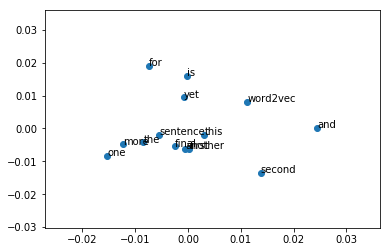

In [5]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
#%matplotlib notebook
%matplotlib inline

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

#### Load Google’s Word2Vec Embedding

[Download](https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)

In [ ]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

#### Load Stanford’s GloVe Embedding


[Download](https://nlp.stanford.edu/projects/glove/)

In [ ]:

from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


### fastext Embeddings



Wiki word vectors
We are publishing pre-trained word vectors for 294 languages, trained on Wikipedia using fastText. These vectors in dimension 300 were obtained using the skip-gram model described in Bojanowski et al. (2016) with default parameters.

In [ ]:
https://fasttext.cc/docs/en/pretrained-vectors.html